In [ ]:
# installing libraries

! pip install pandas
! pip install seaborn

In [2]:
# importing all the nessesary tools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# converting csv file to pandas dataframe

customer_data = pd.read_csv("./data/customer_data.csv")
customer_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [4]:
# amount of Nan in each column

print(customer_data.isnull().sum())

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64


In [5]:
# filling out all Nans in "fea_2" with its mean value

customer_data['fea_2'].fillna(customer_data['fea_2'].mean(), inplace=True)

In [6]:
# complete dataset
# key element is 'label' column. it divides all customers into low(0) and high(1) credit risk groups

customer_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,48.211113,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1250.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1283.911373,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1310.000000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [7]:
# doing a split on test and train datasets

x_train, x_test, y_train, y_test = train_test_split(customer_data.iloc[:, 2:], customer_data.iloc[:, 0], test_size=0.20, stratify=customer_data.iloc[:, 0])
print(x_train.describe())
print('----------')
print(y_train.describe())

            fea_1        fea_2       fea_3           fea_4       fea_5   
count  900.000000   900.000000  900.000000      900.000000  900.000000  \
mean     5.534444  1282.755736    2.342222   119677.777778    1.926667   
std      1.383171    48.671191    0.878994    82703.422014    0.260828   
min      1.000000  1116.500000    1.000000    15000.000000    1.000000   
25%      4.000000  1248.500000    1.000000    72000.000000    2.000000   
50%      5.000000  1283.911373    3.000000   101000.000000    2.000000   
75%      7.000000  1308.500000    3.000000   138000.000000    2.000000   
max      7.000000  1481.000000    3.000000  1000000.000000    2.000000   

            fea_6       fea_7       fea_8       fea_9         fea_10   
count  900.000000  900.000000  900.000000  900.000000     900.000000  \
mean    10.896667    4.872222  100.696667    4.174444  166431.622222   
std      2.642468    2.966687   12.055498    0.866900  152726.712831   
min      3.000000   -1.000000   64.000000    

In [8]:
# adding stratify parameter helps keeping ratio of low to high credit risk groups same as in the dataset

print('dataset mean:', customer_data['label'].mean())
print('train set mean:', y_train.mean())
print('test set mean:', y_test.mean())

dataset mean: 0.2
train set mean: 0.2
test set mean: 0.2


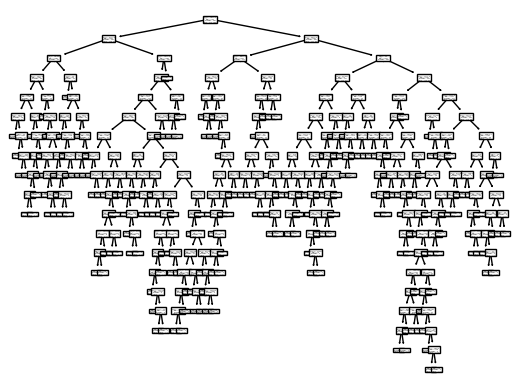

In [10]:
# training a decision tree model

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
plot_tree(classifier)
plt.show()

In [11]:
# predicting y_test values

y_pred = classifier.predict(x_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[139  41]
 [ 33  12]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       180
           1       0.23      0.27      0.24        45

    accuracy                           0.67       225
   macro avg       0.52      0.52      0.52       225
weighted avg       0.69      0.67      0.68       225



In [13]:
# drawing confusion matrix

def plot_cmatrix(test, pred):
    cmat = confusion_matrix(test, pred)
    fig = plt.figure(figsize=(3, 3))
    plt.matshow(cmat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2))
    plt.xticks(range(2))
    plt.colorbar()
    plt.xlabel('Predicted risk')
    plt.ylabel('Actual risk')

    for i in range(2):
        for j in range(2):
            plt.text(i - 0.1, j+0.05, str(cmat[j, i]), color='tab:red')

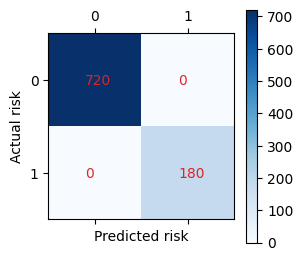

In [14]:
# train confusion matrix

plot_cmatrix(y_train, classifier.predict(x_train))

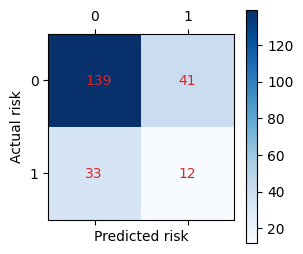

In [15]:
# test confusion matrix

plot_cmatrix(y_test, classifier.predict(x_test))

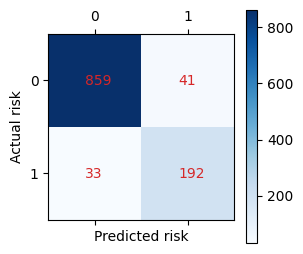

In [16]:
# dataset confusion matrix

plot_cmatrix(customer_data.iloc[:, 0], classifier.predict(customer_data.iloc[:, 2:]))

In [20]:
# ?
print(classifier.score(x_test, y_test))

0.6711111111111111
